preprocessing

In [1]:
library(readxl)

In [2]:
df <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/data/tidy/Cumulative_Data.xlsx",sheet=1)
head(df)

Country,Year,Survey,imws,phom,pipy,ptap,H_PN,H_POP,bore,...,acar,mcyc,pcar,boat,P_LWQ,P_SWQ,P_MWQ,P_FWQ,P_HWQ,wigc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,NA,NA,20.1,...,5.8,35.2,11.8,NA,20,20.0,20.0,20,20.0,0.1
Albania,2017-18,DHS,98.4,48.8,5.2,2.4,NA,NA,1.4,...,3.2,9.6,37.0,0.7,20,20.0,20.0,20,20.0,0.1
Albania,2008-09,DHS,96.8,52.1,9.7,2.7,NA,NA,4.4,...,5.0,10.0,29.1,0.6,20,20.0,20.0,20,20.0,NA
Angola,2015-16,DHS,66.9,4.3,9.7,10.3,11.4,NA,1.9,...,1.3,17.8,10.9,0.4,20,20.0,20.0,20,20.0,0.3
Angola,2011,MIS,58.9,5.7,7.0,17.0,NA,NA,3.2,...,NA,14.6,12.2,1.0,20,20.0,20.0,20,20.0,NA
Angola,2006-07,MIS,65.6,5.5,10.7,9.6,NA,NA,1.1,...,1.4,9.2,14.0,NA,20,20.1,19.9,20,20.1,NA


Cleaning Column Years

In [3]:
for (i in seq(1, nrow(df))) {
    if (grepl("-", df[i,'Year'])) {
        yy1 = substr(df[i,"Year"], start=1,stop=2)
        yy2 = substr(df[i,"Year"], start=6,stop=7)
        yy3 = paste(yy1,yy2,sep = "")
        #yy3 = as.integer(yy3)
        df[i,"Year"] = yy3
    }
    }

Finding the Max Years

In [4]:
df$Year = as.numeric(df$Year)
df1 <- matrix(NA, nrow = 0, ncol = length(colnames(df))) #create new empty DF
colnames(df1) = colnames(df) # assign column names to empty data frame
for (country in unique(df$Country)) {
    maxyear = max(df[df$Country==country,'Year'])
    df1 = rbind( df1, df[(df$Country==country) & (df$Year==maxyear),])
} 

Removing Population Variables (Removal of duplication)

In [5]:
dfh = df1[,!grepl("^P_",names(df1))]

NA and zeros Analysis

In [6]:
na_count = colSums(is.na(dfh)) #Counting all your NA in each data frames
na_count

Country    Year  Survey    imws    phom    pipy    ptap    H_PN   H_POP    bore 
      0       0       0       1       4       6       5      44      77      18 
   pwel    pspr    rain    truc    ctan    venw    bott    sacw    purf    uiws 
     15      19      17       9      26      76       8      69      74       1 
   wepu    uwel    sppu    uspr    surw    othw    iwsp    basw    liws    watp 
     68      13      69      21       8      11       7       7       7       7 
   tles    tmor    wnao    niod    bicy    acar    mcyc    pcar    boat    wigc 
      7       7      54      54       5      22       4       1      25      19

Removing column for household data frame if NA is greater than 50%`

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,NA,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,NA
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,NA,6.4,0.8,NA,0.3


Country    Year  Survey    imws    phom    pipy    ptap    bore    pwel    pspr 
      0       0       0       1       4       6       5      18      15      19 
   rain    truc    ctan    bott    uiws    uwel    uspr    surw    othw    iwsp 
     17       9      26       8       1      13      21       8      11       7 
   basw    liws    watp    tles    tmor    bicy    acar    mcyc    pcar    boat 
      7       7       7       7       7       5      22       4       1      25 
   wigc 
     19

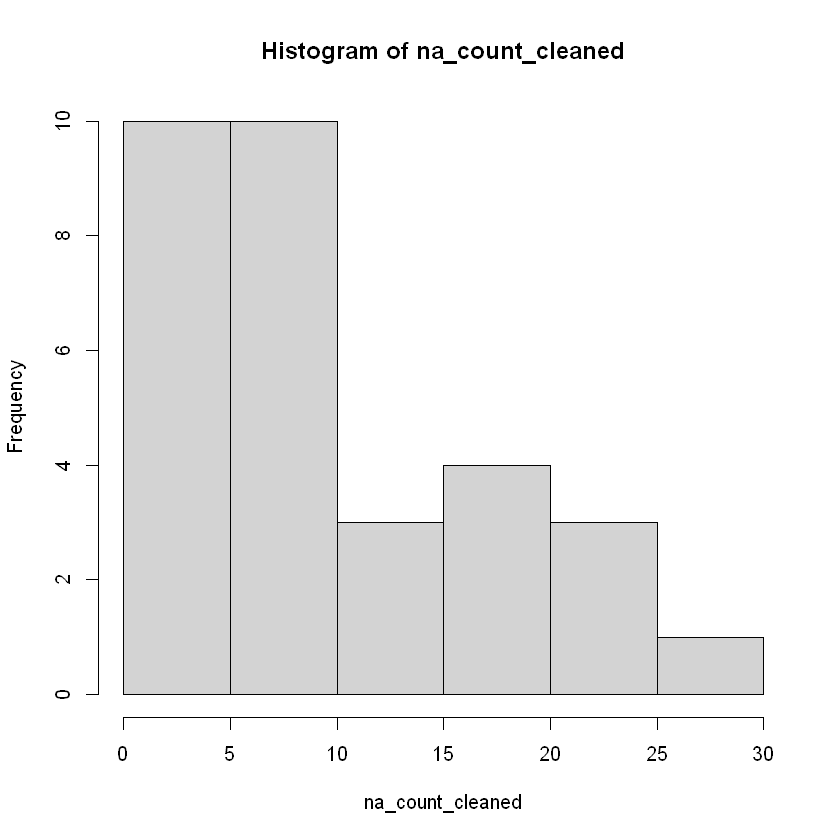

In [7]:
dfsimple = dfh[, which(colMeans(!is.na(dfh)) > 0.5)]
head(dfsimple)
na_count_cleaned = colSums(is.na(dfsimple)) #Counting all your NA in each data frames
na_count_cleaned
hist(na_count_cleaned)
zeros = colSums(dfsimple != 0) # Counting all your zeros in each data frame

Preliminary Data Visualization

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.10    7.20   19.10   19.96   28.60   83.60       1 

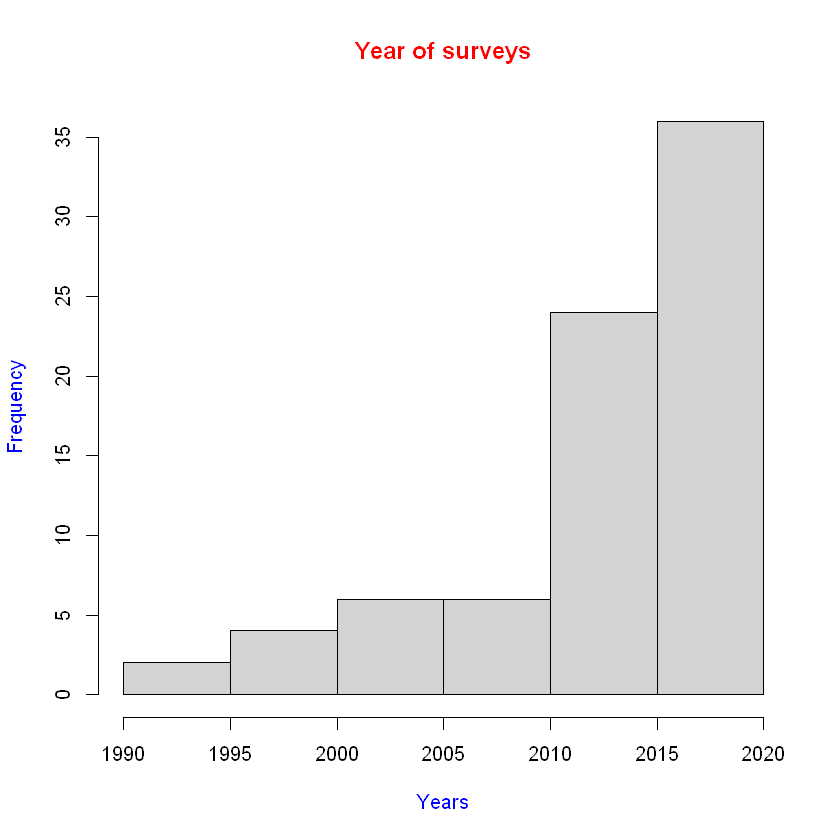

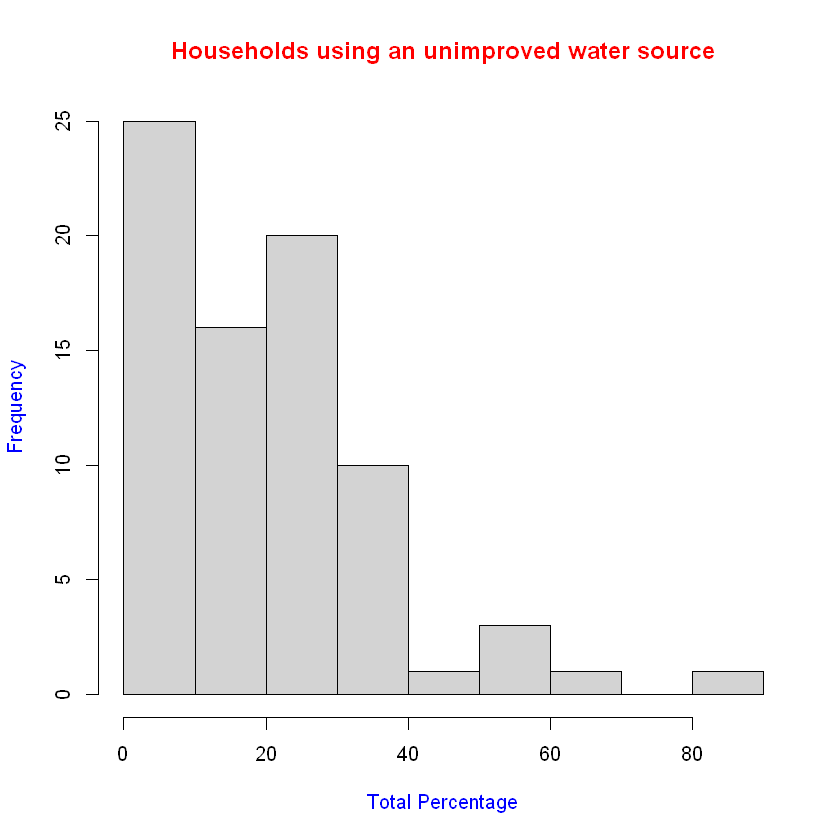

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.30   10.50   20.70   23.76   33.50   82.00       5 

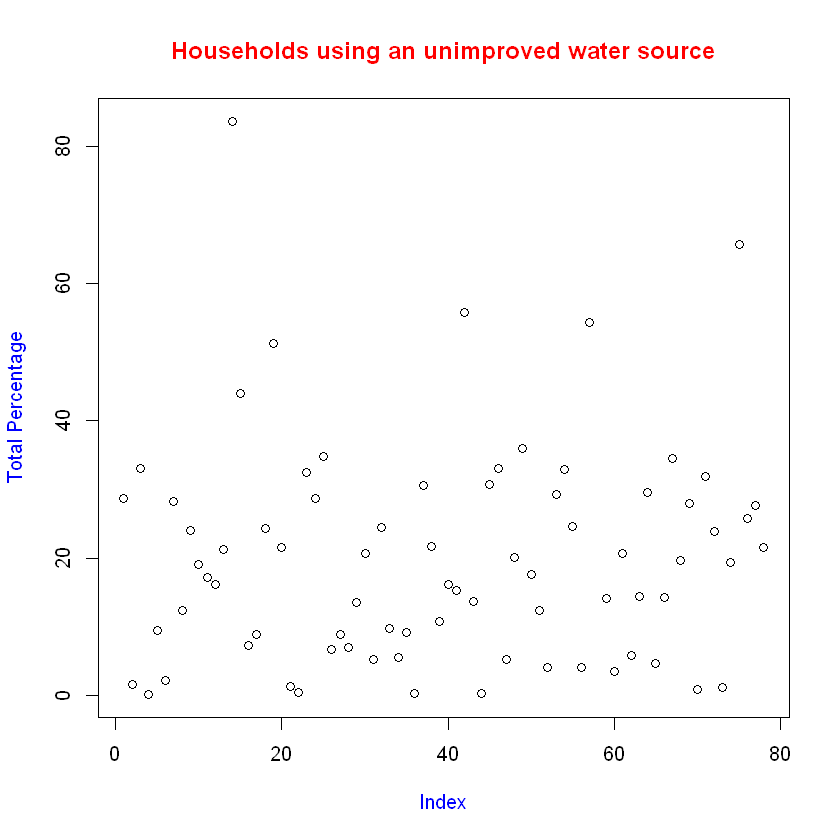

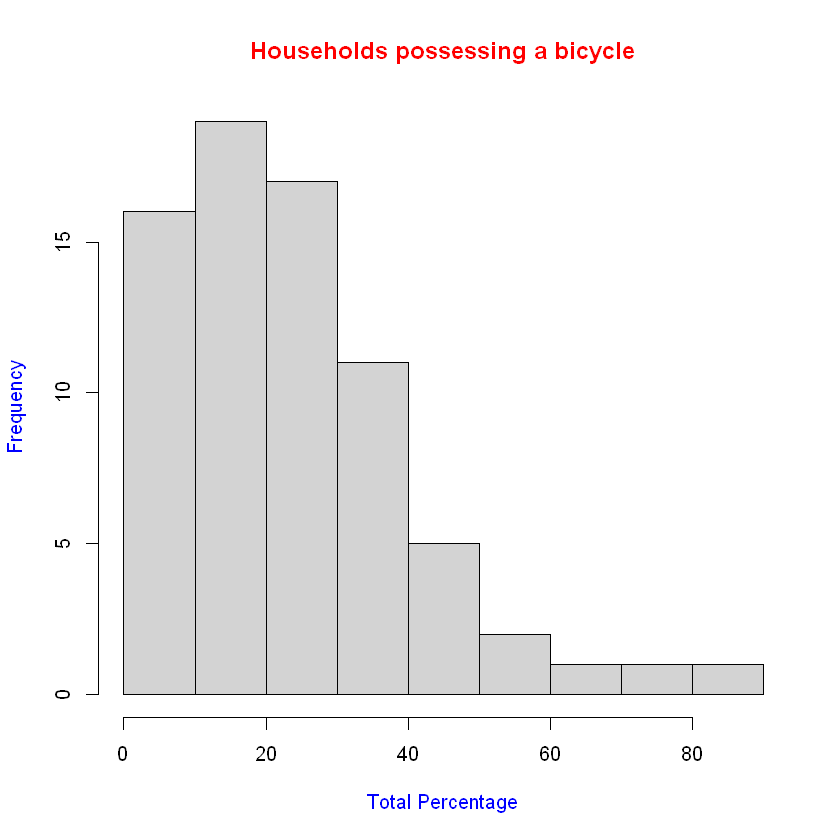

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1900    1999    2007    2006    2013    2019 

   Length     Class      Mode 
       78 character character 

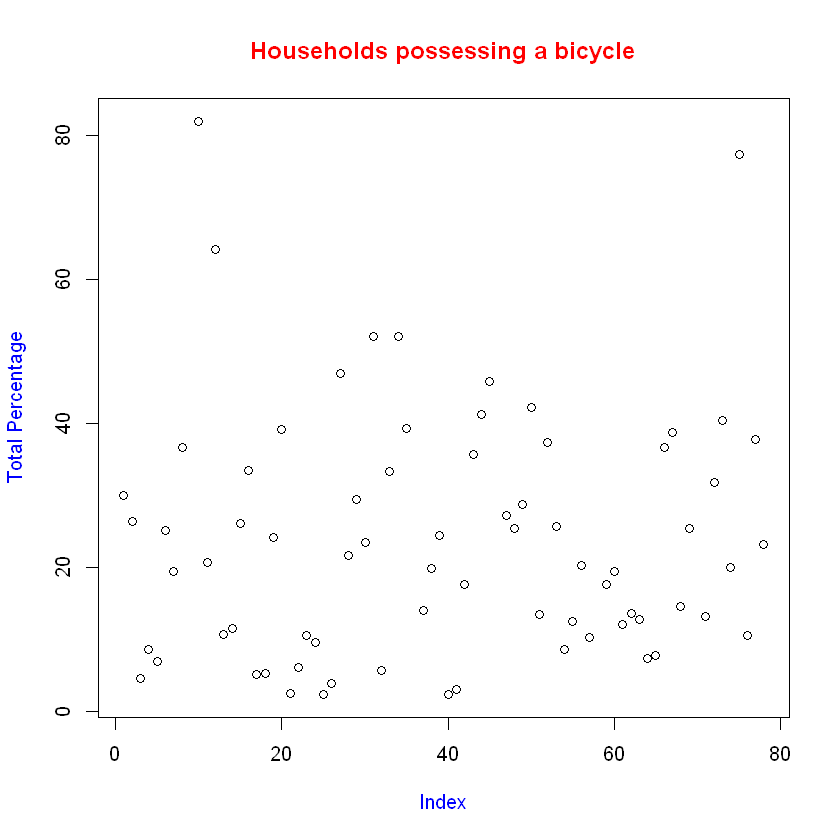

In [8]:
hist(dfsimple$ 'Year', main="Year of surveys",
     xlab="Years",
     ylab="Frequency",
     col.main="red", col.lab="blue")
summary(dfsimple$uiws ) # House hold with unimproved water source
hist(dfsimple$uiws, main="Households using an unimproved water source",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(dfsimple$uiws , main="Households using an unimproved water source",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(dfsimple$bicy) # house hold with possession of bicycle. 
hist(dfsimple$bicy, main="Households possessing a bicycle",
     xlab="Total Percentage",
     ylab="Frequency",
     col.main="red", col.lab="blue")
plot(dfsimple$bicy, main="Households possessing a bicycle",
     xlab="Index",
     ylab="Total Percentage",
     col.main="red", col.lab="blue")
summary(df$Year)
summary(dfsimple$Country)

In [9]:
write.csv(dfsimple, '../../results/dfsimple.csv')